[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'Apple Stock Prices'}, xlabel='Date'>

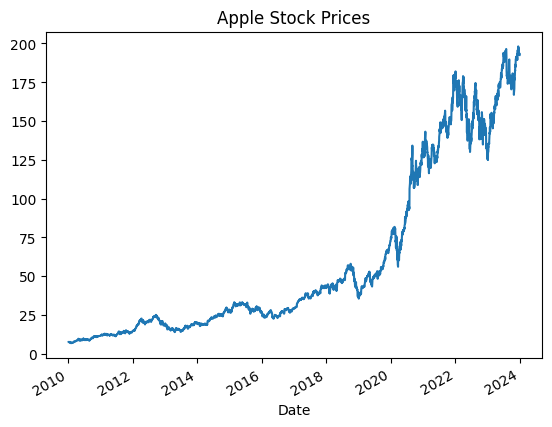

In [ ]:
import yfinance as yf

# Download historical data for a specific stock (e.g., Apple)
data = yf.download('AAPL', start='2010-01-01', end='2024-01-01')
data.to_csv('AAPL_stock_prices.csv')  # Save data to CSV if needed
data['Close'].plot(title='Apple Stock Prices')


In [ ]:
import yfinance as yf

# Hypothetical list of tickers for the S&P 100 companies
tickers = [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'BRK-B', 'JNJ', 'V', 'PG', 'JPM',
    'UNH', 'MA', 'INTC', 'VZ', 'T', 'HD', 'DIS', 'PFE', 'MRK', 'KO',
    'PEP', 'BAC', 'CSCO', 'CMCSA', 'NFLX', 'ADBE', 'NVDA', 'XOM', 'CVX', 'ABBV',
    'ABT', 'COST', 'LLY', 'MCD', 'ACN', 'PM', 'WMT', 'TMO', 'MDT', 'AVGO',
    'QCOM', 'TXN', 'LIN', 'HON', 'DHR', 'UPS', 'UNP', 'LOW', 'IBM', 'C',
    'BA', 'GS', 'AMGN', 'NEE', 'SBUX', 'MMM', 'RTX', 'CAT', 'ORCL', 'MS',
    'SCHW', 'BLK', 'GE', 'NOW', 'DE', 'LMT', 'SPGI', 'CVS', 'AMD', 'BMY',
    'CHTR', 'FIS', 'ZTS', 'GILD', 'ISRG', 'BKNG', 'TGT', 'BDX', 'SYK', 'MO',
    'EL', 'DUK', 'CI', 'PNC', 'USB', 'SO', 'GM', 'CCI', 'PLD', 'ADP',
    'D', 'CB', 'MMC', 'ICE', 'NSC', 'EW', 'MU', 'F', 'DXCM', 'SHW', 'PGR',
    'REGN', 'NOC', 'CL', 'ITW', 'ETN', 'WM'
]

# Download stock data for these companies
data = yf.download(tickers, start='2010-01-01', end='2024-01-01')

# Save the closing prices to a CSV file
closing_prices = data['Adj Close']
closing_prices.to_csv('top_100_companies_stock_prices.csv')

# Print the first few rows to check
print(closing_prices.head())


[*********************100%%**********************]  106 of 106 completed


Ticker          AAPL  ABBV        ABT        ACN       ADBE        ADP   AMD  \
Date                                                                           
2010-01-04  6.461976   NaN  18.952158  32.212456  37.090000  26.725904  9.70   
2010-01-05  6.473148   NaN  18.799042  32.411537  37.700001  26.582376  9.71   
2010-01-06  6.370185   NaN  18.903442  32.756100  37.619999  26.519981  9.57   
2010-01-07  6.358407   NaN  19.060045  32.725468  36.889999  26.507504  9.47   
2010-01-08  6.400681   NaN  19.157486  32.595310  36.689999  26.470049  9.43   

Ticker           AMGN    AMZN       AVGO  ...        UNH        UNP  \
Date                                      ...                         
2010-01-04  41.200783  6.6950  13.528631  ...  25.497292  24.128284   
2010-01-05  40.843884  6.7345  13.629060  ...  25.456848  24.464069   
2010-01-06  40.536949  6.6125  13.736654  ...  25.707537  24.500967   
2010-01-07  40.165764  6.5000  13.650579  ...  26.694111  24.283266   
2010-01-08  4

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the saved CSV file
data = pd.read_csv('top_100_companies_stock_prices.csv', index_col='Date', parse_dates=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Define a function to create sequences for LSTM training
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

look_back = 5  # Number of previous time steps to consider for predicting the next time step
X, y = create_dataset(data_scaled.values, look_back)


In [ ]:
# Split the data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM network model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dense(units=y_train.shape[1])  # Output layer nodes = number of features, which is the number of companies
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/20
88/88 [==============================] - 7s 32ms/step - loss: nan - val_loss: nan
Epoch 2/20
88/88 [==============================] - 1s 15ms/step - loss: nan - val_loss: nan
Epoch 3/20
88/88 [==============================] - 1s 11ms/step - loss: nan - val_loss: nan
Epoch 4/20
88/88 [==============================] - 1s 11ms/step - loss: nan - val_loss: nan
Epoch 5/20
88/88 [==============================] - 1s 11ms/step - loss: nan - val_loss: nan
Epoch 6/20
88/88 [==============================] - 1s 11ms/step - loss: nan - val_loss: nan
Epoch 7/20
88/88 [==============================] - 1s 13ms/step - loss: nan - val_loss: nan
Epoch 8/20
88/88 [==============================] - 1s 11ms/step - loss: nan - val_loss: nan
Epoch 9/20
88/88 [==============================] - 1s 11ms/step - loss: nan - val_loss: nan
Epoch 10/20
88/88 [==============================] - 1s 11ms/step - loss: nan - val_loss: nan
Epoch 11/20
88/88 [==============================] - 1s 11ms/step - l

22/22 [==============================] - 2s 4ms/step


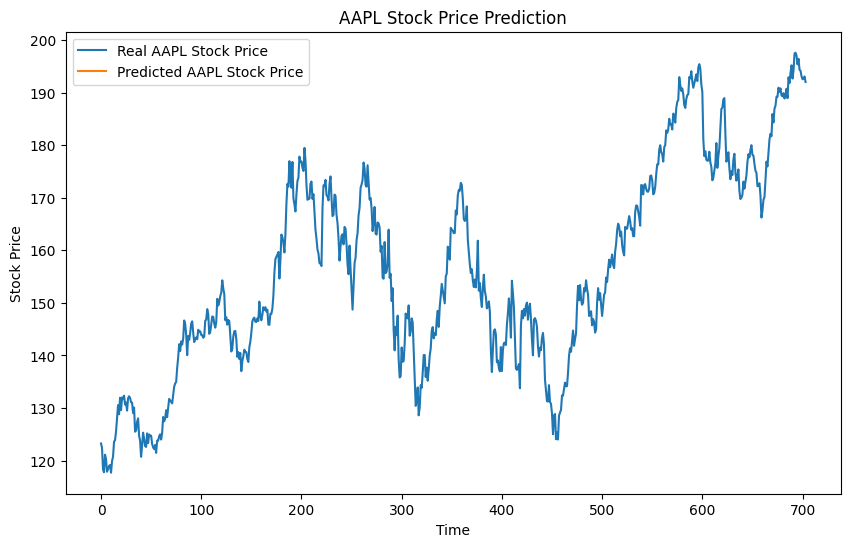

In [ ]:
predicted_stock_price = model.predict(X_test)

# Inverting the normalization
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_test)

# Plotting some results for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(real_stock_price[:, 0], label='Real AAPL Stock Price')  # Just plotting for AAPL as an example
plt.plot(predicted_stock_price[:, 0], label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Apply the function to each column in the data
for ticker in data.columns:
    print(f"Results for {ticker}:")
    test_stationarity(data[ticker].dropna())


Results for AAPL:
Results of Dickey-Fuller Test:
Test Statistic                    0.920971
p-value                           0.993358
#Lags Used                       18.000000
Number of Observations Used    3503.000000
Critical Value (1%)              -3.432218
Critical Value (5%)              -2.862365
Critical Value (10%)             -2.567209
dtype: float64
Results for ABBV:
Results of Dickey-Fuller Test:
Test Statistic                   -0.114517
p-value                           0.947973
#Lags Used                       10.000000
Number of Observations Used    2757.000000
Critical Value (1%)              -3.432724
Critical Value (5%)              -2.862589
Critical Value (10%)             -2.567328
dtype: float64
Results for ABT:
Results of Dickey-Fuller Test:
Test Statistic                   -0.330464
p-value                           0.921078
#Lags Used                       15.000000
Number of Observations Used    3506.000000
Critical Value (1%)              -3.432217
Critica

In [ ]:
# Function to clean data
def clean_data(data):
    data = data.replace([np.inf, -np.inf], np.nan)  # Replace infinities with nan
    data = data.dropna()  # Drop all rows with nan values
    return data

# Apply cleaning
data = data.apply(clean_data)



In [ ]:
def make_stationary(timeseries):
    # Initial ADF test
    result = adfuller(timeseries.dropna())
    print('Initial ADF Statistic: %f' % result[0])
    print('Initial p-value: %f' % result[1])

    # Differencing until stationary
    timeseries_diff = timeseries
    d = 0
    while result[1] > 0.05:  # Using a significance level of 5%
        timeseries_diff = timeseries_diff.diff().dropna()
        result = adfuller(timeseries_diff.dropna())
        d += 1
        print(f'Differencing level {d}, ADF Statistic: {result[0]}, p-value: {result[1]}')

    return timeseries_diff, d

# Apply the function to each stock and store the degree of differencing needed
degrees_of_differencing = {}
for ticker in data.columns:
    print(f"Processing {ticker}:")
    data[ticker], degrees_of_differencing[ticker] = make_stationary(data[ticker])


Processing AAPL:
Initial ADF Statistic: 0.920971
Initial p-value: 0.993358
Differencing level 1, ADF Statistic: -13.60423470263362, p-value: 1.927044472562959e-25
Processing ABBV:
Initial ADF Statistic: -0.114517
Initial p-value: 0.947973
Differencing level 1, ADF Statistic: -16.895748737088336, p-value: 1.036821339306114e-29
Processing ABT:
Initial ADF Statistic: -0.330464
Initial p-value: 0.921078
Differencing level 1, ADF Statistic: -16.365313497741496, p-value: 2.844505297381646e-29
Processing ACN:
Initial ADF Statistic: 0.553181
Initial p-value: 0.986403
Differencing level 1, ADF Statistic: -14.075768313347043, p-value: 2.8867201115342527e-26
Processing ADBE:
Initial ADF Statistic: 0.029126
Initial p-value: 0.960876
Differencing level 1, ADF Statistic: -18.855198300184316, p-value: 0.0
Processing ADP:
Initial ADF Statistic: -0.204035
Initial p-value: 0.938039
Differencing level 1, ADF Statistic: -11.250201911157601, p-value: 1.7195777369725194e-20
Processing AMD:
Initial ADF Stati

In [ ]:
# Example: Print the degrees of differencing needed for each ticker
print(degrees_of_differencing)


{'AAPL': 1, 'ABBV': 1, 'ABT': 1, 'ACN': 1, 'ADBE': 1, 'ADP': 1, 'AMD': 1, 'AMGN': 1, 'AMZN': 1, 'AVGO': 1, 'BA': 1, 'BAC': 1, 'BDX': 1, 'BKNG': 1, 'BLK': 1, 'BMY': 1, 'BRK-B': 1, 'C': 1, 'CAT': 1, 'CB': 1, 'CCI': 1, 'CHTR': 1, 'CI': 1, 'CL': 1, 'CMCSA': 1, 'COST': 1, 'CSCO': 1, 'CVS': 1, 'CVX': 1, 'D': 1, 'DE': 1, 'DHR': 1, 'DIS': 1, 'DUK': 1, 'DXCM': 1, 'EL': 1, 'ETN': 1, 'EW': 1, 'F': 0, 'FIS': 1, 'GE': 1, 'GILD': 1, 'GM': 1, 'GOOGL': 1, 'GS': 1, 'HD': 1, 'HON': 1, 'IBM': 1, 'ICE': 1, 'INTC': 1, 'ISRG': 1, 'ITW': 1, 'JNJ': 1, 'JPM': 1, 'KO': 1, 'LIN': 1, 'LLY': 1, 'LMT': 1, 'LOW': 1, 'MA': 1, 'MCD': 1, 'MDT': 1, 'MMC': 1, 'MMM': 1, 'MO': 1, 'MRK': 1, 'MS': 1, 'MSFT': 1, 'MU': 1, 'NEE': 1, 'NFLX': 1, 'NOC': 1, 'NOW': 1, 'NSC': 1, 'NVDA': 1, 'ORCL': 1, 'PEP': 1, 'PFE': 1, 'PG': 1, 'PGR': 1, 'PLD': 1, 'PM': 1, 'PNC': 1, 'QCOM': 1, 'REGN': 1, 'RTX': 1, 'SBUX': 1, 'SCHW': 1, 'SHW': 1, 'SO': 1, 'SPGI': 1, 'SYK': 1, 'T': 1, 'TGT': 1, 'TMO': 1, 'TXN': 1, 'UNH': 1, 'UNP': 1, 'UPS': 1, 'USB': 

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Function to evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(timeseries, arima_order):
    # Split dataset
    train_size = int(len(timeseries) * 0.8)
    train, test = timeseries[0:train_size], timeseries[train_size:]
    history = [x for x in train]

    # Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # Calculate mean squared error
    error = mean_squared_error(test, predictions)
    return error

# Function to determine the best ARIMA parameters
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order, mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return best_cfg

# Example of parameter ranges
p_values = range(0, 1)
d_values = range(0, 1)
q_values = range(0, 1)
best_cfg = evaluate_models(data['AAPL'], p_values, d_values, q_values)


ARIMA(0, 0, 0) MSE=6.882
Best ARIMA(0, 0, 0) MSE=6.882


In [13]:
# Fit an ARIMA model
model = ARIMA(data['AAPL'], order=best_cfg)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make forecast
forecast = model_fit.forecast(steps=5)
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 3522
Model:                          ARIMA   Log Likelihood               -6292.251
Date:                Fri, 31 May 2024   AIC                          12588.501
Time:                        04:02:11   BIC                          12600.835
Sample:                             0   HQIC                         12592.901
                               - 3522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0527      0.024      2.164      0.030       0.005       0.100
sigma2         2.0881      0.019    108.277      0.000       2.050       2.126
Ljung-Box (L1) (Q):                   4.79   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


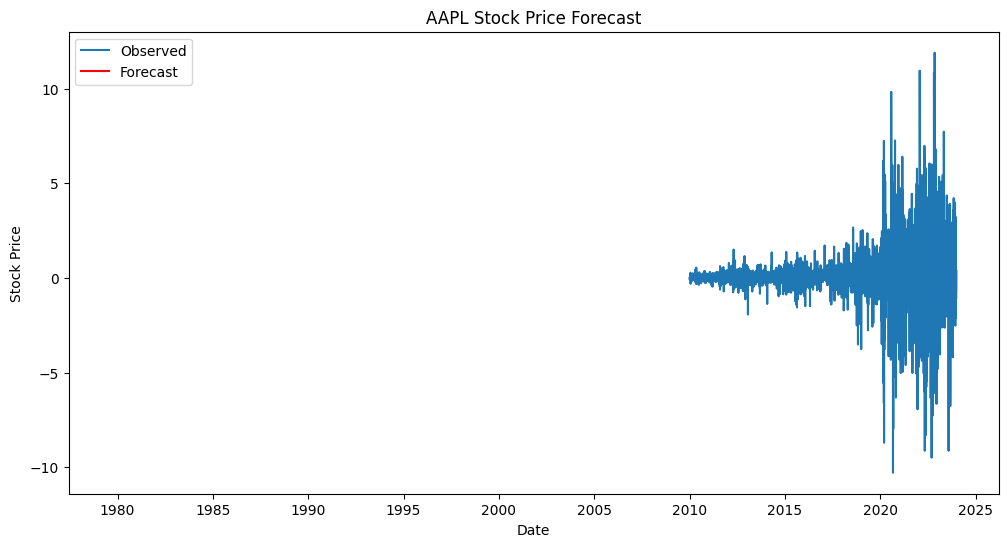

In [14]:
# Plot the forecasts along with the history
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'].index, data['AAPL'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('AAPL Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'Apple Stock Prices'}, xlabel='Date'>

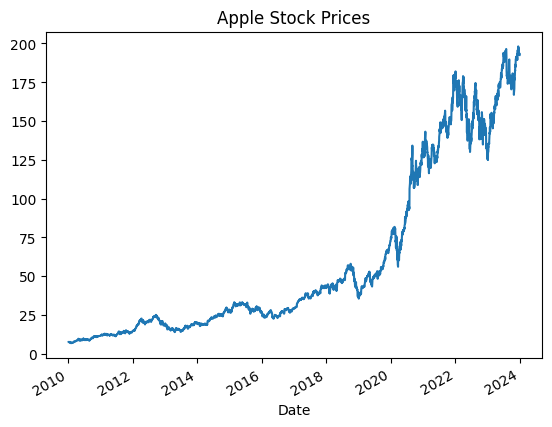

In [15]:
import yfinance as yf

# Download historical data for a specific stock (e.g., Apple)
data = yf.download('AAPL', start='2010-01-01', end='2024-01-01')
data.to_csv('AAPL_stock_prices.csv')  # Save data to CSV if needed
data['Close'].plot(title='Apple Stock Prices')


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv('AAPL_stock_prices.csv', index_col='Date', parse_dates=True)

# Fill any missing values
data['Close'] = data['Close'].fillna(method='ffill')

# Scale the Close prices
scaler = MinMaxScaler(feature_range=(0, 1))
data['Scaled_Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [18]:
import numpy as np

def create_sequences(data, window=10):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:(i + window)])
        y.append(data[i + window])
    return np.array(X), np.array(y)

X, y = create_sequences(data['Scaled_Close'].values)

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model_arima = ARIMA(data['Close'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast
forecast_arima = model_arima_fit.forecast(steps=5)
print(forecast_arima)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


3522    192.517840
3523    192.516584
3524    192.533203
3525    192.551636
3526    192.511195
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Reshape features for LSTM model
X_lstm = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model_lstm.fit(X_lstm, y, epochs=50, batch_size=72)


Epoch 1/50
49/49 [==============================] - 10s 16ms/step - loss: 0.0177
Epoch 2/50
49/49 [==============================] - 1s 16ms/step - loss: 3.6215e-04
Epoch 3/50
49/49 [==============================] - 1s 15ms/step - loss: 2.4918e-04
Epoch 4/50
49/49 [==============================] - 1s 15ms/step - loss: 2.4362e-04
Epoch 5/50
49/49 [==============================] - 1s 16ms/step - loss: 2.3394e-04
Epoch 6/50
49/49 [==============================] - 1s 16ms/step - loss: 2.2814e-04
Epoch 7/50
49/49 [==============================] - 1s 18ms/step - loss: 2.3966e-04
Epoch 8/50
49/49 [==============================] - 1s 18ms/step - loss: 2.4752e-04
Epoch 9/50
49/49 [==============================] - 1s 27ms/step - loss: 2.2748e-04
Epoch 10/50
49/49 [==============================] - 1s 27ms/step - loss: 2.2694e-04
Epoch 11/50
49/49 [==============================] - 1s 25ms/step - loss: 2.3007e-04
Epoch 12/50
49/49 [==============================] - 1s 25ms/step - loss: 2.3

110/110 [==============================] - 3s 10ms/step


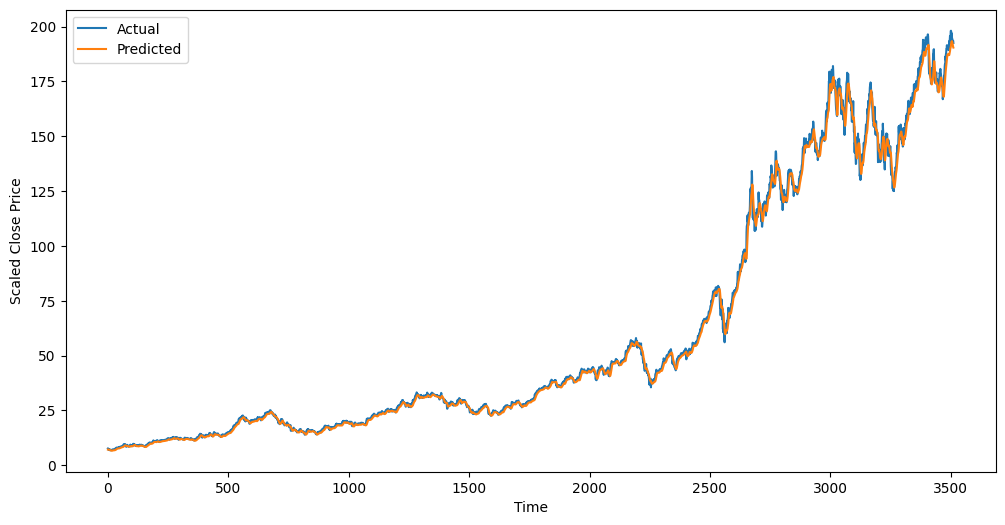

In [21]:
# Make predictions
y_pred = model_lstm.predict(X_lstm)

# Inverse scaling of predicted values
y_pred = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()